In [1]:
import numpy as np
from PIL import Image

In [2]:
def median_filter(image, kernel_size):
    width, height = image.size
    half_kernel = kernel_size // 2
    image = np.array(image)

    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(half_kernel, height - half_kernel):
        for x in range(half_kernel, width - half_kernel):
            window = image[y - half_kernel:y + half_kernel + 1, x - half_kernel:x + half_kernel + 1]
            window = sorted((window.reshape((1,-1)))[0])
            median_value = np.median(window)
            result[y, x] = int(median_value)

    return Image.fromarray(result)

In [3]:
input_image = Image.open("saturn3.gif")

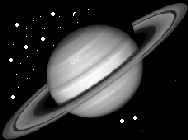

In [4]:
input_image

In [5]:
kernel_size = 3
output_image = median_filter(input_image, kernel_size)

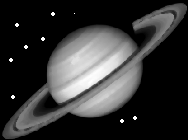

In [6]:
output_image


In [7]:
output_image.save("output.gif")

In [8]:
input_image2 = Image.open("moon.tif")

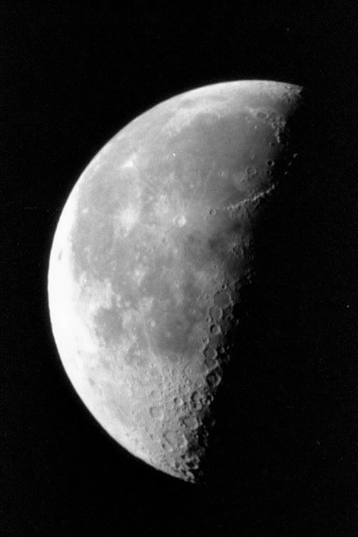

In [9]:
input_image2

In [10]:
import scipy as sp

In [257]:
F_u_v = sp.fftpack.fft(input_image2)
F_u_v.shape

(537, 358)

In [282]:
M = 50
a =1
b =10

In [283]:
answ = np.zeros(F_u_v.shape, dtype=complex)

answ= M *sp.fftpack.ifft( np.log(a + b * np.abs(F_u_v)) * F_u_v/np.abs(F_u_v+0.00001) )

In [284]:
from IPython.display import display

print(np.array(input_image2), np.abs(answ) )



[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]] [[23.88317817  2.40213049 21.60088378 ... 18.00617613 81.31362129
  15.69869188]
 [44.20930955 38.4880888  17.86251002 ... 13.5396742  49.65231159
  62.39473806]
 [25.99993266 16.28725466 17.02215244 ... 22.01828438 32.29467102
  14.9888629 ]
 ...
 [15.78237841 31.44766313 16.01950485 ...  1.80541627 14.32605031
  29.31334353]
 [ 4.85202467 35.1685593  26.3597806  ... 18.63299389  9.03739001
   1.10398917]
 [15.34135177  0.7248843   5.73293841 ... 18.03359456 33.53160232
  37.00151288]]


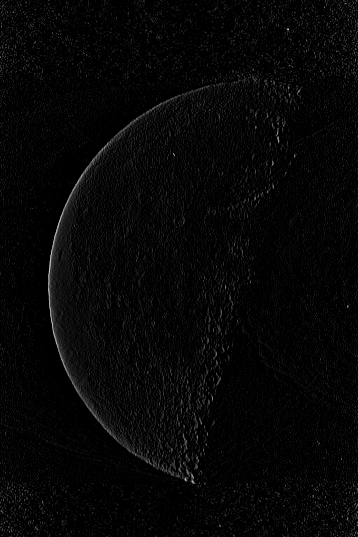

In [285]:
img  =Image.fromarray(np.real(answ))
img.convert('RGB')